In [77]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import numpy as np

In [105]:
x,y=make_blobs(n_samples=500,n_features=2,centers=2,random_state=6)

In [106]:
print(x.shape)
print(y.shape)

(500, 2)
(500,)


In [107]:
print(x[:5])

[[ 8.95494062 -2.9069843 ]
 [ 6.48560623 -9.18705652]
 [ 7.4417209  -0.64602418]
 [ 8.78576349 -3.02093379]
 [ 6.78951954 -3.58857926]]


In [108]:
print(y[:5])

[0 1 0 0 0]


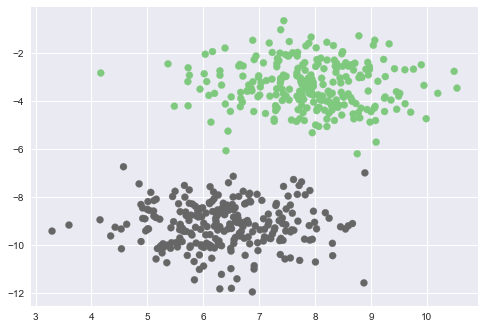

In [109]:
plt.style.use("seaborn")
plt.scatter(x[:,0],x[:,1],c=y,cmap=plt.cm.Accent)
plt.show()

In [110]:
def sigmoid(z):
    return 1/(1+np.exp(-z))

In [111]:
z=np.array([1,2,3,4,5,6])
print(sigmoid(z))

[0.73105858 0.88079708 0.95257413 0.98201379 0.99330715 0.99752738]


In [112]:
def predict(x,weights):
    z=np.dot(x,weights)
    pred=sigmoid(z)
    return pred

In [113]:
def loss(x,y,weights):
    y_=predict(x,weights)
    cost=np.mean(-y*np.log(y_)-(1-y)*np.log(1-y_))
    return cost

In [114]:
def update(x,y,weights,l_rate):
    y_=predict(x,weights)
    dw=np.dot(x.T,y_-y)
    m=x.shape[0]
    weights=weights-l_rate*dw/float(m)
    return weights

In [136]:
def train(x,y,l_rate=0.5,max_epochs=100):
    ones=np.ones((x.shape[0],1))
    x=np.hstack((ones,x))
    weights=np.zeros(x.shape[1])
      #  [0,0,0,0,0,....]
    for epoch in range(max_epochs):
        weights=update(x,y,weights,l_rate)
        if(epoch%10==0):
            l=loss(x,y,weights)
            print("epoch %d loss %0.4f"%(epoch,l))
    return weights

In [137]:
print(train(x,y))

epoch 0 loss 0.6686
epoch 10 loss 0.0156
epoch 20 loss 0.0152
epoch 30 loss 0.0149
epoch 40 loss 0.0147
epoch 50 loss 0.0144
epoch 60 loss 0.0142
epoch 70 loss 0.0141
epoch 80 loss 0.0139
epoch 90 loss 0.0137
[-0.22003644 -1.87001875 -2.20740284]


In [117]:
weights=train(x,y,l_rate=0.8,max_epochs=1000)
print(weights)
print(weights.shape)

[-0.93805977 -2.74013164 -3.33441291]
(3,)


In [118]:
# wts=np.zeros(x.shape[1])
# print(predict(x,wts))

In [119]:
def getPredictions(x_test,weights,labels=True):
#     print(x_test.shape)
#     print(weights.shape)
    if x_test.shape[1]!=weights.shape[0]:
        ones=np.ones((x_test.shape[0],1))
        x_test=np.hstack((ones,x_test))
    probs=predict(x_test,weights)
    if not labels: return probs
    else:
        labels=np.zeros(probs.shape)
        labels[probs>=0.5]=1;
        return labels

In [138]:
y_=getPredictions(x,weights,labels=True)
print(y_)

[0. 1. 0. 0. 0. 1. 0. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 1.
 0. 0. 0. 1. 0. 1. 0. 1. 1. 0. 0. 1. 1. 0. 1. 0. 1. 0. 1. 0. 0. 0. 0. 0.
 1. 0. 0. 0. 1. 0. 1. 1. 0. 1. 1. 1. 1. 0. 0. 1. 0. 1. 1. 1. 1. 0. 0. 1.
 1. 0. 0. 0. 1. 0. 0. 1. 0. 1. 1. 0. 1. 1. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0.
 0. 0. 0. 1. 1. 0. 0. 0. 0. 1. 1. 0. 1. 1. 0. 1. 1. 1. 0. 0. 1. 1. 1. 0.
 0. 0. 1. 1. 0. 0. 1. 1. 1. 1. 0. 0. 0. 0. 1. 1. 0. 0. 1. 0. 1. 1. 1. 1.
 1. 0. 0. 1. 1. 0. 0. 1. 0. 1. 0. 1. 0. 0. 1. 0. 1. 1. 1. 1. 0. 0. 0. 0.
 0. 1. 1. 0. 0. 0. 1. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 0. 1. 0. 0. 1. 1. 1.
 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 0. 1. 0. 0. 0. 0. 1. 1. 0. 1. 0. 1. 1.
 1. 0. 0. 1. 1. 1. 1. 0. 1. 0. 0. 1. 1. 1. 0. 1. 0. 0. 1. 1. 0. 0. 1. 1.
 0. 1. 1. 0. 1. 1. 0. 1. 1. 0. 0. 1. 1. 1. 0. 0. 0. 1. 1. 0. 0. 0. 1. 1.
 0. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 1. 0. 1. 1. 0. 0. 0. 0. 1. 1.
 1. 0. 1. 0. 0. 1. 1. 0. 1. 1. 1. 0. 0. 0. 1. 0. 1. 0. 0. 1. 0. 0. 0. 0.
 1. 1. 0. 0. 0. 1. 1. 1. 0. 1. 0. 1. 1. 1. 0. 0. 1.

In [135]:
print(np.sum(y_==y)/y.shape[0])

0.996


In [128]:
x1=np.linspace(-2,12,10)
print(x1)

[-2.         -0.44444444  1.11111111  2.66666667  4.22222222  5.77777778
  7.33333333  8.88888889 10.44444444 12.        ]


In [129]:
x2=-(weights[0]+weights[1]*x1)/weights[2]

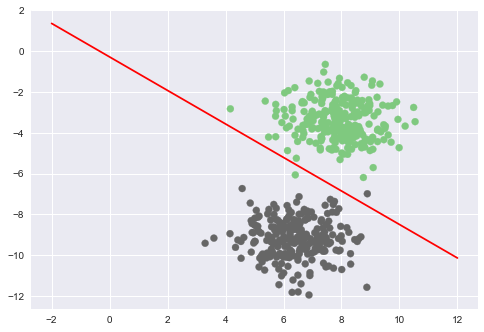

In [132]:
plt.scatter(x[:,0],x[:,1],c=y,cmap=plt.cm.Accent)
plt.plot(x1,x2,c="red")
plt.show()